In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
from matplotlib.path import Path
from matplotlib.patches import PathPatch

In [2]:
# Parameters for matplotlib (these should be the same as the ones used for SHD)
fontsize = 20
matplotlib.rcParams.update({
    "font.size": fontsize,
    "axes.titlesize": fontsize,
    "axes.labelsize": fontsize, #* 2,
    "xtick.labelsize": fontsize,
    "ytick.labelsize": fontsize,
    "xtick.major.size": fontsize * .8,
    "ytick.major.size": fontsize * .8,
    "legend.fontsize": fontsize,
    #"font.family": "Times new Roman",
    "figure.dpi": 100,
    "savefig.dpi": 300,
    #"text.usetex": True,
    "path.simplify": True,
    "figure.figsize": (8, 6)
})

plt.rcParams["figure.facecolor"] = "w"


# Class to deal in an easy way with number of digits in colorbars (used for ULs and sigma maps)
class FormatScalarFormatter(matplotlib.ticker.ScalarFormatter):
            def __init__(self, fformat="%1.1f", offset=True, mathText=True):
                self.fformat = fformat
                matplotlib.ticker.ScalarFormatter.__init__(self,useOffset=offset,
                                                        useMathText=mathText)
            def _set_format(self):
                self.format = self.fformat
                if self._useMathText:
                    #self.format = '$%s$' % matplotlib.ticker._mathdefault(self.format)
                    self.format = '$%s$' % ('\\mathdefault{%s}' % self.format)

# Coordinate system polarisation basis

(-1.0, 1.0) (-1.0, 1.0)
0.24999999999999997


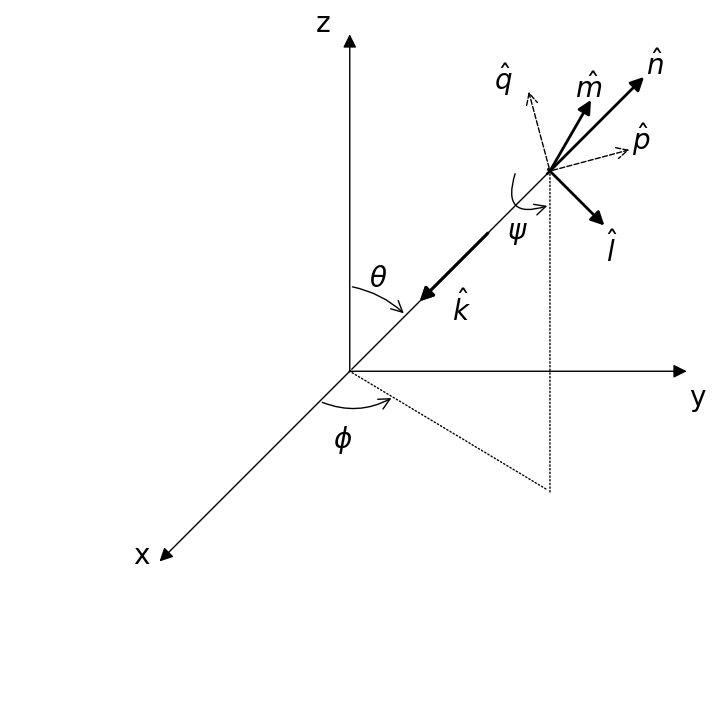

In [3]:
fig, ax = plt.subplots(subplot_kw={'aspect': 'equal'}, figsize = (12,9))

xmax = 1
ymax = 1
ax.set_xlim(-xmax, xmax)
ax.set_ylim(-ymax, ymax)
print(ax.get_xlim(), ax.get_ylim())

# Eliminate upper and right axes
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.spines['left'].set_color('none')
ax.spines['bottom'].set_color('none')

#Eliminate ticks
plt.tick_params(left = False, bottom = False, labelleft=False, labelbottom = False)

origin = (0, 0)

y_axis_origin = (-0.01*xmax, 0)
y_axis_end = (xmax, 0)

z_axis_origin = (0, -0.01*ymax)
z_axis_end = (0, ymax)

#x-axis: fake 45 deg with -z-axis

x_axis_origin = ((xmax/np.sqrt(2))*0.01, (ymax/np.sqrt(2))*0.01)
x_axis_end = (-(xmax/np.sqrt(2))/1.25, -(ymax/np.sqrt(2))/1.25)




#GW axis: fake 45 deg with z-axis
gw_axis_origin = (0, 0)
gw_axis_end = (xmax/np.sqrt(2)/1.2, ymax/np.sqrt(2)/1.2)
#gw_axis_end = (xmax*np.sqrt(3)/2, ymax/2)


#GW axis xy-projection
gw_axis_xy_origin = (0, 0)
gw_axis_xy_end = (gw_axis_end[-1], -(ymax/np.sqrt(2)/2))


#GW axis z-projection 
gw_axis_z_origin = (gw_axis_xy_end[0], gw_axis_xy_end[-1]-ymax*0.01)
gw_axis_z_end = (gw_axis_xy_end[0], gw_axis_end[-1]+ 0.01*ymax/np.sqrt(2))


#n axis: fake 45 deg with z-axis
n_axis_origin = (gw_axis_end[0]-0.02*xmax/np.sqrt(2), gw_axis_end[-1]-0.02*ymax/np.sqrt(2))
n_axis_end = (gw_axis_end[0]+0.4*xmax/np.sqrt(2), gw_axis_end[-1]+0.4*ymax/np.sqrt(2))

#k axis: fake 45 deg with z-axis
k_axis_origin = (gw_axis_end[0]-0.55*xmax/np.sqrt(2), gw_axis_end[-1]-0.55*ymax/np.sqrt(2))
k_axis_end = (gw_axis_end[0]-0.25*xmax/np.sqrt(2), gw_axis_end[-1]-0.25*ymax/np.sqrt(2))


#psi
psi_start = (gw_axis_end[0]-0.1*xmax, gw_axis_end[1])
psi_end = (gw_axis_end[0], gw_axis_end[1]-0.1*ymax)

#theta
theta_start = (0, 0.25*ymax)
theta_end = (gw_axis_end[0]-0.6*xmax/np.sqrt(2), gw_axis_end[-1]-0.6*ymax/np.sqrt(2))

#phi
phi_start = (-xmax/np.sqrt(2)*0.125, -ymax/np.sqrt(2)*0.125)
phi_end = (xmax*np.sqrt(3)/2*0.15, -ymax*(0.5)*0.15)

#l axis: perpendicular to n-axis
l_axis_origin = (gw_axis_end[0]-0.015*xmax/np.sqrt(2), gw_axis_end[-1]+0.015*ymax/np.sqrt(2))#gw_axis_end
l_axis_end = (l_axis_origin[0]+0.25*xmax/np.sqrt(2), l_axis_origin[-1]-0.25*ymax/np.sqrt(2))

l_length = np.sqrt((l_axis_end[0]-l_axis_origin[0])**2 +(l_axis_end[-1]-l_axis_origin[-1])**2)

print(l_length)

#m axis: perpendicular to n-axis
m_axis_origin = gw_axis_end
m_axis_end = (m_axis_origin[0]- l_length*np.cos(np.pi*8/12), m_axis_origin[-1]+l_length*np.sin(np.pi*8/12))


#q-axis
q_axis_origin = gw_axis_end
#q_axis_end = (q_axis_origin[0], q_axis_origin[-1]+l_length)
q_axis_end = (q_axis_origin[0]+l_length*np.sin(-np.pi/12), q_axis_origin[-1]+l_length*np.cos(-np.pi/12))

#p-axis
p_axis_origin = gw_axis_end
#p_axis_end = (p_axis_origin[0]+l_length, p_axis_origin[-1])
p_axis_end = (p_axis_origin[0]+l_length*np.cos(-np.pi/12), p_axis_origin[-1]-l_length*np.sin(-np.pi/12))











ax.annotate("",
            xy = y_axis_end, xycoords='data',
            xytext = y_axis_origin, textcoords='data',
            arrowprops=dict(arrowstyle="-|>",
                            connectionstyle="arc3", color='k', lw=1),
            )
ax.annotate("y", (xmax, -0.1*ymax), textcoords='data')

ax.annotate("",
            xy=z_axis_end, xycoords='data',
            xytext = z_axis_origin, textcoords='data',
            arrowprops=dict(arrowstyle="-|>",
                            connectionstyle="arc3", color='k', lw=1),
            )

ax.annotate("z", (-0.1, ymax), textcoords='data')

ax.annotate("",
            xy=x_axis_end, xycoords='data',
            xytext=x_axis_origin, textcoords='data',
            arrowprops=dict(arrowstyle="-|>",
                            connectionstyle="arc3", color='k', lw=1),
            )

ax.annotate("x", (x_axis_end[0]-0.1*xmax/np.sqrt(2), x_axis_end[-1]), textcoords='data')


ax.annotate("",
            xy=gw_axis_xy_end, xycoords='data',
            xytext=gw_axis_xy_origin, textcoords='data',
            arrowprops=dict(arrowstyle="-",
                            connectionstyle="arc3", color='k', lw=1, linestyle = "dotted"),
            )

ax.annotate("",
            xy=gw_axis_z_end, xycoords='data',
            xytext=gw_axis_z_origin, textcoords='data',
            arrowprops=dict(arrowstyle="-",
                            connectionstyle="arc3", color='k', lw=1, linestyle = "dotted"),
            )

ax.annotate("",
            xy=gw_axis_end, xycoords='data',
            xytext=gw_axis_origin, textcoords='data',
            arrowprops=dict(arrowstyle="-",
                            connectionstyle="arc3", color='k', lw=1),
            )

ax.annotate("",
            xy=n_axis_end, xycoords='data',
            xytext=n_axis_origin, textcoords='data',
            arrowprops=dict(arrowstyle="-|>",
                            connectionstyle="arc3", color='k', lw=2),
            )

ax.annotate(r"$\hat{n}$", (n_axis_end[0], n_axis_end[-1]), textcoords='data')

ax.annotate("",
            xy=k_axis_end, xycoords='data',
            xytext=k_axis_origin, textcoords='data',
            arrowprops=dict(arrowstyle="<|-",
                            connectionstyle="arc3", color='k', lw=2),
            )

ax.annotate(r"$\hat{k}$", (k_axis_origin[0]+0.1*xmax, k_axis_origin[-1]-0.05*ymax), textcoords='data')

ax.annotate("",
            xy=psi_end, xycoords='data',
            xytext=psi_start, textcoords='data',
            arrowprops=dict(arrowstyle="->",color='k', lw=1, connectionstyle = "arc3,rad=1."),
            )

ax.annotate(r"$\psi$", (k_axis_end[0] +0.05*xmax, k_axis_end[-1]*0.95), textcoords='data')

ax.annotate("",
            xy=theta_end, xycoords='data',
            xytext=theta_start, textcoords='data',
            arrowprops=dict(arrowstyle="->",color='k', lw=1, connectionstyle = "arc3,rad=-0.15"),
            )

ax.annotate(r"$\theta$", (0.35*theta_end[0], theta_start[-1]), textcoords='data')


ax.annotate("",
            xy=phi_end, xycoords='data',
            xytext=phi_start, textcoords='data',
            arrowprops=dict(arrowstyle="->",color='k', lw=1, connectionstyle = "arc3,rad=0.25"),
            )

ax.annotate(r"$\phi$", (-xmax*0.05, -ymax*0.225), textcoords='data')

ax.annotate("",
            xy=k_axis_end, xycoords='data',
            xytext=k_axis_origin, textcoords='data',
            arrowprops=dict(arrowstyle="<|-",
                            connectionstyle="arc3", color='k', lw=2),
            )

ax.annotate("",
            xy=l_axis_end, xycoords='data',
            xytext=l_axis_origin, textcoords='data',
            arrowprops=dict(arrowstyle="-|>",
                            connectionstyle="arc3", color='k', lw=2),
            )
ax.annotate(r"$\hat{l}$", (l_axis_end[0], l_axis_end[-1]-0.1*ymax), textcoords='data')


ax.annotate("",
            xy=m_axis_end, xycoords='data',
            xytext=m_axis_origin, textcoords='data',
            arrowprops=dict(arrowstyle="-|>",
                            connectionstyle="arc3", color='k', lw=2),
            )
ax.annotate(r"$\hat{m}$", (m_axis_end[0]-0.05, m_axis_end[-1]), textcoords='data')



ax.annotate("",
            xy=q_axis_end, xycoords='data',
            xytext=q_axis_origin, textcoords='data',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3", color='k', lw=1, linestyle= "dashed"),
            )

ax.annotate(r"$\hat{q}$", (q_axis_end[0]-0.1, q_axis_end[-1]), textcoords='data')


ax.annotate("",
            xy=p_axis_end, xycoords='data',
            xytext=p_axis_origin, textcoords='data',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3", color='k', lw=1, linestyle= "dashed"),
            )
ax.annotate(r"$\hat{p}$", (p_axis_end[0], p_axis_end[-1]), textcoords='data')


plt.savefig("Coordinate_system.pdf", bbox_inches = "tight")
plt.show()

## Interferometer

(-0.6, 1.0) (-0.6, 1.0)
0.24999999999999997


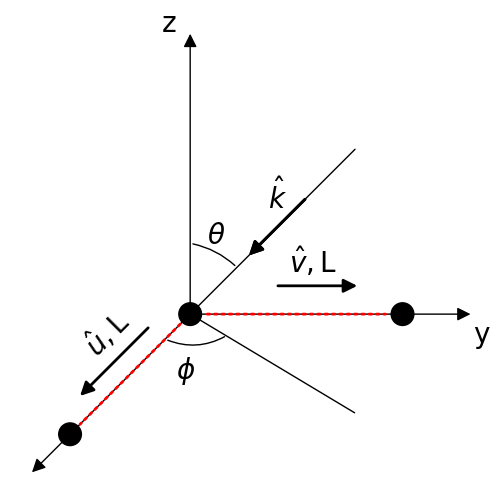

In [4]:
fig, ax = plt.subplots(subplot_kw={'aspect': 'equal'}, figsize = (8,6))

xmax = 1
ymax = 1
ax.set_xlim(-0.6, xmax)
ax.set_ylim(-0.6, ymax)
print(ax.get_xlim(), ax.get_ylim())

# Eliminate upper and right axes
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.spines['left'].set_color('none')
ax.spines['bottom'].set_color('none')

#Eliminate ticks
plt.tick_params(left = False, bottom = False, labelleft=False, labelbottom = False)

origin = (0, 0)

y_axis_origin = (-0.01*xmax, 0)
y_axis_end = (xmax, 0)

z_axis_origin = (0, -0.01*ymax)
z_axis_end = (0, ymax)

#x-axis: fake 45 deg with -z-axis

x_axis_origin = ((xmax/np.sqrt(2))*0.01, (ymax/np.sqrt(2))*0.01)
x_axis_end = (-(xmax/np.sqrt(2))/1.25, -(ymax/np.sqrt(2))/1.25)




#GW axis: fake 45 deg with z-axis
gw_axis_origin = (0, 0)
gw_axis_end = (xmax/np.sqrt(2)/1.2, ymax/np.sqrt(2)/1.2)
#gw_axis_end = (xmax*np.sqrt(3)/2, ymax/2)


#GW axis xy-projection
gw_axis_xy_origin = (0, 0)
gw_axis_xy_end = (gw_axis_end[-1], -(ymax/np.sqrt(2)/2))


#GW axis z-projection 
gw_axis_z_origin = (gw_axis_xy_end[0], gw_axis_xy_end[-1]-ymax*0.01)
gw_axis_z_end = (gw_axis_xy_end[0], gw_axis_end[-1]+ 0.01*ymax/np.sqrt(2))


#n axis: fake 45 deg with z-axis
n_axis_origin = (gw_axis_end[0]-0.02*xmax/np.sqrt(2), gw_axis_end[-1]-0.02*ymax/np.sqrt(2))
n_axis_end = (gw_axis_end[0]+0.4*xmax/np.sqrt(2), gw_axis_end[-1]+0.4*ymax/np.sqrt(2))

#k axis: fake 45 deg with z-axis
k_axis_origin = (gw_axis_end[0]-0.55*xmax/np.sqrt(2), gw_axis_end[-1]-0.55*ymax/np.sqrt(2))
k_axis_end = (gw_axis_end[0]-0.25*xmax/np.sqrt(2), gw_axis_end[-1]-0.25*ymax/np.sqrt(2))


#psi
psi_start = (gw_axis_end[0]-0.1*xmax, gw_axis_end[1])
psi_end = (gw_axis_end[0], gw_axis_end[1]-0.1*ymax)

#theta
theta_start = (0, 0.25*ymax)
theta_end = (gw_axis_end[0]-0.6*xmax/np.sqrt(2), gw_axis_end[-1]-0.6*ymax/np.sqrt(2))

#phi
phi_start = (-xmax/np.sqrt(2)*0.125, -ymax/np.sqrt(2)*0.125)
phi_end = (xmax*np.sqrt(3)/2*0.15, -ymax*(0.5)*0.15)

#l axis: perpendicular to n-axis
l_axis_origin = (gw_axis_end[0]-0.015*xmax/np.sqrt(2), gw_axis_end[-1]+0.015*ymax/np.sqrt(2))#gw_axis_end
l_axis_end = (l_axis_origin[0]+0.25*xmax/np.sqrt(2), l_axis_origin[-1]-0.25*ymax/np.sqrt(2))

l_length = np.sqrt((l_axis_end[0]-l_axis_origin[0])**2 +(l_axis_end[-1]-l_axis_origin[-1])**2)

print(l_length)

#m axis: perpendicular to n-axis
m_axis_origin = gw_axis_end
m_axis_end = (m_axis_origin[0]- l_length*np.cos(np.pi*8/12), m_axis_origin[-1]+l_length*np.sin(np.pi*8/12))


#q-axis
q_axis_origin = gw_axis_end
#q_axis_end = (q_axis_origin[0], q_axis_origin[-1]+l_length)
q_axis_end = (q_axis_origin[0]+l_length*np.sin(-np.pi/12), q_axis_origin[-1]+l_length*np.cos(-np.pi/12))

#p-axis
p_axis_origin = gw_axis_end
#p_axis_end = (p_axis_origin[0]+l_length, p_axis_origin[-1])
p_axis_end = (p_axis_origin[0]+l_length*np.cos(-np.pi/12), p_axis_origin[-1]-l_length*np.sin(-np.pi/12))


################################
################################



################################
################################


ax.annotate("",
            xy = y_axis_end, xycoords='data',
            xytext = y_axis_origin, textcoords='data',
            arrowprops=dict(arrowstyle="-|>",
                            connectionstyle="arc3", color='k', lw=1),
            )
ax.annotate("y", (xmax, -0.1*ymax), textcoords='data')

ax.annotate("",
            xy=z_axis_end, xycoords='data',
            xytext = z_axis_origin, textcoords='data',
            arrowprops=dict(arrowstyle="-|>",
                            connectionstyle="arc3", color='k', lw=1),
            )

ax.annotate("z", (-0.1, ymax), textcoords='data')

ax.annotate("",
            xy=x_axis_end, xycoords='data',
            xytext=x_axis_origin, textcoords='data',
            arrowprops=dict(arrowstyle="-|>",
                            connectionstyle="arc3", color='k', lw=1),
            )

ax.annotate("x", (x_axis_end[0]-0.1*xmax/np.sqrt(2), x_axis_end[-1]), textcoords='data')


ax.annotate("",
            xy=gw_axis_xy_end, xycoords='data',
            xytext=gw_axis_xy_origin, textcoords='data',
            arrowprops=dict(arrowstyle="-",
                            connectionstyle="arc3", color='k', lw=1,),
            )


ax.annotate("",
            xy=gw_axis_end, xycoords='data',
            xytext=gw_axis_origin, textcoords='data',
            arrowprops=dict(arrowstyle="-",
                            connectionstyle="arc3", color='k', lw=1),
            )


ax.annotate("",
            xy=k_axis_end, xycoords='data',
            xytext=k_axis_origin, textcoords='data',
            arrowprops=dict(arrowstyle="<|-",
                            connectionstyle="arc3", color='k', lw=2),
            )

ax.annotate(r"$\hat{k}$", (k_axis_origin[0]+0.075*xmax, k_axis_origin[-1]+0.175*ymax), textcoords='data')


ax.annotate("",
            xy=theta_end, xycoords='data',
            xytext=theta_start, textcoords='data',
            arrowprops=dict(arrowstyle="-",color='k', lw=1, connectionstyle = "arc3,rad=-0.15"),
            )

ax.annotate(r"$\theta$", (0.35*theta_end[0], theta_start[-1]), textcoords='data')


ax.annotate("",
            xy=phi_end, xycoords='data',
            xytext=phi_start, textcoords='data',
            arrowprops=dict(arrowstyle="-",color='k', lw=1, connectionstyle = "arc3,rad=0.25"),
            )

ax.annotate(r"$\phi$", (-xmax*0.05, -ymax*0.225), textcoords='data')

ax.annotate("",
            xy=k_axis_end, xycoords='data',
            xytext=k_axis_origin, textcoords='data',
            arrowprops=dict(arrowstyle="<|-",
                            connectionstyle="arc3", color='k', lw=2),
            )

ax.annotate("",
            xy=(x_axis_end[0]*0.7, x_axis_end[-1]*0.7), xycoords='data',
            xytext=(x_axis_end[0]*0.05, x_axis_end[-1]*0.05), textcoords='data',
            arrowprops=dict(arrowstyle="-",
                            connectionstyle="arc3", color='r', lw=2, linestyle= "dotted"),
            )

ax.annotate("",
            xy=(y_axis_end[0]*0.7, y_axis_end[-1]*0.7), xycoords='data',
            xytext=(y_axis_end[0]*0.05, y_axis_end[-1]*0.05), textcoords='data',
            arrowprops=dict(arrowstyle="-",
                            connectionstyle="arc3", color='r', lw=2, linestyle= "dotted"),
            )

ellipse = Ellipse((0, 0), 0.08*xmax, 0.08*ymax, angle=0., fill = True, color = "black")
ax.add_artist(ellipse)

ellipse = Ellipse((0.75*xmax, 0), 0.08*xmax, 0.08*ymax, angle=0., fill = True, color = "black")
ax.add_artist(ellipse)

ellipse = Ellipse((x_axis_end[0]*0.75, x_axis_end[-1]*0.75), 0.08*xmax, 0.08*ymax, angle=0., fill = True, color = "black")
ax.add_artist(ellipse)

v_start = (y_axis_end[0]*0.3, 0.1*xmax)
v_end = (y_axis_end[0]*0.6, 0.1*xmax)
u_start = (0.25*x_axis_end[0], 0.25*x_axis_end[-1]+0.1*ymax)
u_end = (0.7*x_axis_end[0], 0.7*x_axis_end[-1]+0.1*ymax)

ax.annotate("",
            xy=v_end, xycoords='data',
            xytext=v_start, textcoords='data',
            arrowprops=dict(arrowstyle="-|>",
                            connectionstyle="arc3", color='k', lw=2),
            )

ax.annotate(r"$\hat{v},$L", (v_start[0]+0.05*xmax, v_start[-1]+0.05*ymax), textcoords='data')

ax.annotate("",
            xy=u_end, xycoords='data',
            xytext=u_start, textcoords='data',
            arrowprops=dict(arrowstyle="-|>",
                            connectionstyle="arc3", color='k', lw=2),
            )
ax.annotate(r"$\hat{u},$L", (u_end[0], u_end[-1]+0.15*ymax), textcoords='data', rotation = 45)


plt.savefig("Coordinate_system_interferometer.pdf", bbox_inches = "tight")
plt.show()
plt.close()

## Single arm

(-0.2, 0.6) (-0.2, 0.95)
0.24999999999999994
2.122599005155251 0.20113232175698234


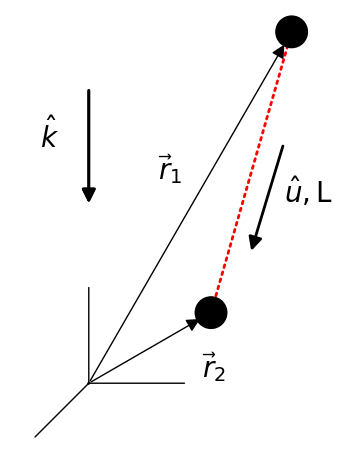

In [5]:
fig, ax = plt.subplots(subplot_kw={'aspect': 'equal'}, figsize = (8,6))

xmax = 1
ymax = 1
ax.set_xlim(-0.2, 0.6)
ax.set_ylim(-0.2, 0.95)
print(ax.get_xlim(), ax.get_ylim())

# Eliminate upper and right axes
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.spines['left'].set_color('none')
ax.spines['bottom'].set_color('none')

#Eliminate ticks
plt.tick_params(left = False, bottom = False, labelleft=False, labelbottom = False)

origin = (0, 0)

y_axis_origin = (-0.01*xmax, 0)
y_axis_end = (xmax, 0)

z_axis_origin = (0, -0.01*ymax)
z_axis_end = (0, ymax)

#x-axis: fake 45 deg with -z-axis

x_axis_origin = ((xmax/np.sqrt(2))*0.01, (ymax/np.sqrt(2))*0.01)
x_axis_end = (-(xmax/np.sqrt(2))/1.25, -(ymax/np.sqrt(2))/1.25)




#GW axis: fake 45 deg with z-axis
gw_axis_origin = (0, 0)
gw_axis_end = (xmax/2, ymax*np.sqrt(3)/2)
#gw_axis_end = (xmax*np.sqrt(3)/2, ymax/2)


#GW axis xy-projection
gw_axis_xy_origin = (0, 0)
gw_axis_xy_end = (gw_axis_end[-1], -(ymax/np.sqrt(2)/2))


#GW axis z-projection 
gw_axis_z_origin = (gw_axis_xy_end[0], gw_axis_xy_end[-1]-ymax*0.01)
gw_axis_z_end = (gw_axis_xy_end[0], gw_axis_end[-1]+ 0.01*ymax/np.sqrt(2))


#n axis: fake 45 deg with z-axis
n_axis_origin = (gw_axis_end[0]-0.02*xmax/np.sqrt(2), gw_axis_end[-1]-0.02*ymax/np.sqrt(2))
n_axis_end = (gw_axis_end[0]+0.4*xmax/np.sqrt(2), gw_axis_end[-1]+0.4*ymax/np.sqrt(2))

#k axis: fake 45 deg with z-axis
k_axis_origin = (0, z_axis_end[-1]-0.55*ymax)
k_axis_end = (0, z_axis_end[-1]-0.25*ymax)


#psi
psi_start = (gw_axis_end[0]-0.1*xmax, gw_axis_end[1])
psi_end = (gw_axis_end[0], gw_axis_end[1]-0.1*ymax)

#theta
theta_start = (0, 0.25*ymax)
theta_end = (gw_axis_end[0]-0.6*xmax/np.sqrt(2), gw_axis_end[-1]-0.6*ymax/np.sqrt(2))

#phi
phi_start = (-xmax/np.sqrt(2)*0.125, -ymax/np.sqrt(2)*0.125)
phi_end = (xmax*np.sqrt(3)/2*0.15, -ymax*(0.5)*0.15)

#l axis: perpendicular to n-axis
l_axis_origin = (gw_axis_end[0]-0.015*xmax/np.sqrt(2), gw_axis_end[-1]+0.015*ymax/np.sqrt(2))#gw_axis_end
l_axis_end = (l_axis_origin[0]+0.25*xmax/np.sqrt(2), l_axis_origin[-1]-0.25*ymax/np.sqrt(2))

l_length = np.sqrt((l_axis_end[0]-l_axis_origin[0])**2 +(l_axis_end[-1]-l_axis_origin[-1])**2)

print(l_length)

#m axis: perpendicular to n-axis
m_axis_origin = gw_axis_end
m_axis_end = (m_axis_origin[0]- l_length*np.cos(np.pi*8/12), m_axis_origin[-1]+l_length*np.sin(np.pi*8/12))


#q-axis
q_axis_origin = gw_axis_end
#q_axis_end = (q_axis_origin[0], q_axis_origin[-1]+l_length)
q_axis_end = (q_axis_origin[0]+l_length*np.sin(-np.pi/12), q_axis_origin[-1]+l_length*np.cos(-np.pi/12))

#p-axis
p_axis_origin = gw_axis_end
#p_axis_end = (p_axis_origin[0]+l_length, p_axis_origin[-1])
p_axis_end = (p_axis_origin[0]+l_length*np.cos(-np.pi/12), p_axis_origin[-1]-l_length*np.sin(-np.pi/12))


################################
################################



################################
################################


ax.annotate("",
            xy = (y_axis_end[0]*0.25,y_axis_end[-1]*0.25), xycoords='data',
            xytext = y_axis_origin, textcoords='data',
            arrowprops=dict(arrowstyle="-",
                            connectionstyle="arc3", color='k', lw=1),
            )
#ax.annotate("y", (xmax, -0.1*ymax), textcoords='data')

ax.annotate("",
            xy=(z_axis_end[0]*0.25,z_axis_end[-1]*0.25), xycoords='data',
            xytext = z_axis_origin, textcoords='data',
            arrowprops=dict(arrowstyle="-",
                            connectionstyle="arc3", color='k', lw=1),
            )

#ax.annotate("z", (-0.1, ymax), textcoords='data')

ax.annotate("",
            xy=(x_axis_end[0]*0.25,x_axis_end[-1]*0.25), xycoords='data',
            xytext=x_axis_origin, textcoords='data',
            arrowprops=dict(arrowstyle="-",
                            connectionstyle="arc3", color='k', lw=1),
            )

#ax.annotate("x", (x_axis_end[0]-0.1*xmax/np.sqrt(2), x_axis_end[-1]), textcoords='data')



ax.annotate("",
            xy=gw_axis_end, xycoords='data',
            xytext=gw_axis_origin, textcoords='data',
            arrowprops=dict(arrowstyle="-|>",
                            connectionstyle="arc3", color='k', lw=1),
            )

ax.annotate(r"$\vec{r}_{1}$",(gw_axis_end[0]*0.55-0.1*xmax, gw_axis_end[-1]*0.6), textcoords='data',)

ax.annotate("",
            xy=k_axis_end, xycoords='data',
            xytext=k_axis_origin, textcoords='data',
            arrowprops=dict(arrowstyle="<|-",
                            connectionstyle="arc3", color='k', lw=2),
            )

ax.annotate(r"$\hat{k}$", (k_axis_origin[0]-0.125*xmax, k_axis_origin[-1]+0.15*ymax), textcoords='data')



ax.annotate("",
            xy=k_axis_end, xycoords='data',
            xytext=k_axis_origin, textcoords='data',
            arrowprops=dict(arrowstyle="<|-",
                            connectionstyle="arc3", color='k', lw=2),
            )

r2_origin = gw_axis_origin
r2_end = (xmax*np.sqrt(3)/2/3, ymax/2/3)

ax.annotate("",
            xy=r2_end, xycoords='data',
            xytext=r2_origin, textcoords='data',
            arrowprops=dict(arrowstyle="-|>",
                            connectionstyle="arc3", color='k'),
            )

ax.annotate(r"$\vec{r}_{2}$",(r2_end[0], r2_end[-1]-0.15*xmax), textcoords='data',)

ax.annotate("",
            xy=(gw_axis_end[0]*1.03, gw_axis_end[-1]*1.03), xycoords='data',
            xytext=(r2_end[0]*1.075, r2_end[-1]*1.075), textcoords='data',
            arrowprops=dict(arrowstyle="-",
                            connectionstyle="arc3", color='r', lw=2, linestyle= "dotted"),zorder=0
            )

r12_pendence = (gw_axis_end[1]*1.03-r2_end[-1]*1.075)/(gw_axis_end[0]*1.03-r2_end[-1]*1.075) 
r12_q = (r2_end[-1]*1.075*gw_axis_end[1]*1.03-gw_axis_end[0]*1.03*r2_end[-1]*1.075)/(gw_axis_end[0]*1.03-r2_end[-1]*1.075)
new_r12_q = (r2_end[-1]*1.075+0.1-r12_pendence*(r2_end[0]*1.075+0.1)+r12_q)
print(r12_pendence, r12_q)

#ax.annotate("",
#            xy=(r2_end[0]*1.075+0.1, r2_end[-1]*1.075+0.15), xycoords='data',
#            xytext=(r2_end[0]*1.075+0.15, 0.05*r12_pendence+r12_q+r2_end[-1]*1.075++0.15), textcoords='data',
#            arrowprops=dict(arrowstyle="-",
#                            connectionstyle="arc3", color='k', lw=2,)
#            )

#ax.annotate("",
#            xy=(0+0.1, 0+0.2), xycoords='data',
#            xytext=(0.05+0.1, 0.05*r12_pendence+r12_q+0.2), textcoords='data',
#            arrowprops=dict(arrowstyle="-",
#                            connectionstyle="arc3", color='k', lw=2,)
#            )

ax.annotate("",
            xy=((gw_axis_end[0]-r2_end[0])*0.4+r2_end[0]*1.075 + 0.1*xmax,\
                (gw_axis_end[-1]-r2_end[-1])*0.4+r2_end[-1]*1.075 + 0.15*ymax), xycoords='data',
            xytext=(r2_end[0]*1.075+0.1*xmax, r2_end[-1]*1.075+0.15*ymax), textcoords='data',
            arrowprops=dict(arrowstyle="<|-",
                            connectionstyle="arc3", color='k', lw=2,)
            )

ax.annotate(r"$\hat{u},$L", ((gw_axis_end[0]-r2_end[0])*0.4+r2_end[0]*1.075 + 0.1*xmax,\
                (gw_axis_end[-1]-r2_end[-1])*0.4+r2_end[-1]*1.075), textcoords='data')


ellipse = Ellipse((gw_axis_end[0]*1.03, gw_axis_end[-1]*1.03), 0.08*xmax, 0.08*ymax, angle=0., fill = True, color = "black")
ax.add_artist(ellipse)

ellipse = Ellipse((r2_end[0]*1.075, r2_end[-1]*1.075), 0.08*xmax, 0.08*ymax, angle=0., fill = True, color = "black")
ax.add_artist(ellipse)

plt.savefig("Coordinate_system_single_arm.pdf", bbox_inches = "tight")
plt.show()

# Weak-field approximation

(-1.0, 1.0) (-1.0, 1.0)
0.24999999999999997
33.69006752597979


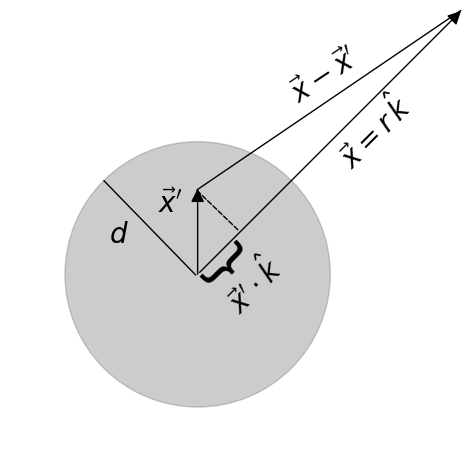

In [6]:
fig, ax = plt.subplots(subplot_kw={'aspect': 'equal'}, figsize = (8,6))

xmax = 1
ymax = 1
ax.set_xlim(-xmax, xmax)
ax.set_ylim(-ymax, ymax)
print(ax.get_xlim(), ax.get_ylim())

# Eliminate upper and right axes
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.spines['left'].set_color('none')
ax.spines['bottom'].set_color('none')

#Eliminate ticks
plt.tick_params(left = False, bottom = False, labelleft=False, labelbottom = False)

origin = (0, 0)

y_axis_origin = (-0.01*xmax, 0)
y_axis_end = (xmax, 0)

z_axis_origin = (0, -0.01*ymax)
z_axis_end = (0, ymax)

#x-axis: fake 45 deg with -z-axis

x_axis_origin = ((xmax/np.sqrt(2))*0.01, (ymax/np.sqrt(2))*0.01)
x_axis_end = (-(xmax/np.sqrt(2))/1.25, -(ymax/np.sqrt(2))/1.25)




#GW axis: fake 45 deg with z-axis
gw_axis_origin = (0, 0)
gw_axis_end = (xmax/np.sqrt(2)/1.2, ymax/np.sqrt(2)/1.2)
#gw_axis_end = (xmax*np.sqrt(3)/2, ymax/2)


#GW axis xy-projection
gw_axis_xy_origin = (0, 0)
gw_axis_xy_end = (gw_axis_end[-1], -(ymax/np.sqrt(2)/2))


#GW axis z-projection 
gw_axis_z_origin = (gw_axis_xy_end[0], gw_axis_xy_end[-1]-ymax*0.01)
gw_axis_z_end = (gw_axis_xy_end[0], gw_axis_end[-1]+ 0.01*ymax/np.sqrt(2))


#n axis: fake 45 deg with z-axis
n_axis_origin = (gw_axis_end[0]-0.02*xmax/np.sqrt(2), gw_axis_end[-1]-0.02*ymax/np.sqrt(2))
n_axis_end = (gw_axis_end[0]+0.4*xmax/np.sqrt(2), gw_axis_end[-1]+0.4*ymax/np.sqrt(2))

#k axis: fake 45 deg with z-axis
k_axis_origin = (gw_axis_end[0]-0.55*xmax/np.sqrt(2), gw_axis_end[-1]-0.55*ymax/np.sqrt(2))
k_axis_end = (gw_axis_end[0]-0.25*xmax/np.sqrt(2), gw_axis_end[-1]-0.25*ymax/np.sqrt(2))


#psi
psi_start = (gw_axis_end[0]-0.1*xmax, gw_axis_end[1])
psi_end = (gw_axis_end[0], gw_axis_end[1]-0.1*ymax)

#theta
theta_start = (0, 0.25*ymax)
theta_end = (gw_axis_end[0]-0.6*xmax/np.sqrt(2), gw_axis_end[-1]-0.6*ymax/np.sqrt(2))

#phi
phi_start = (-xmax/np.sqrt(2)*0.125, -ymax/np.sqrt(2)*0.125)
phi_end = (xmax*np.sqrt(3)/2*0.15, -ymax*(0.5)*0.15)

#l axis: perpendicular to n-axis
l_axis_origin = (gw_axis_end[0]-0.015*xmax/np.sqrt(2), gw_axis_end[-1]+0.015*ymax/np.sqrt(2))#gw_axis_end
l_axis_end = (l_axis_origin[0]+0.25*xmax/np.sqrt(2), l_axis_origin[-1]-0.25*ymax/np.sqrt(2))

l_length = np.sqrt((l_axis_end[0]-l_axis_origin[0])**2 +(l_axis_end[-1]-l_axis_origin[-1])**2)

print(l_length)

#m axis: perpendicular to n-axis
m_axis_origin = gw_axis_end
m_axis_end = (m_axis_origin[0]- l_length*np.cos(np.pi*8/12), m_axis_origin[-1]+l_length*np.sin(np.pi*8/12))


#q-axis
q_axis_origin = gw_axis_end
#q_axis_end = (q_axis_origin[0], q_axis_origin[-1]+l_length)
q_axis_end = (q_axis_origin[0]+l_length*np.sin(-np.pi/12), q_axis_origin[-1]+l_length*np.cos(-np.pi/12))

#p-axis
p_axis_origin = gw_axis_end
#p_axis_end = (p_axis_origin[0]+l_length, p_axis_origin[-1])
p_axis_end = (p_axis_origin[0]+l_length*np.cos(-np.pi/12), p_axis_origin[-1]-l_length*np.sin(-np.pi/12))











#ax.annotate("",
#            xy = y_axis_end, xycoords='data',
#            xytext = y_axis_origin, textcoords='data',
#            arrowprops=dict(arrowstyle="-|>",
#                            connectionstyle="arc3", color='k', lw=1),
#            )
#ax.annotate("y", (xmax, -0.1*ymax), textcoords='data')

#ax.annotate("",
#            xy=z_axis_end, xycoords='data',
#            xytext = z_axis_origin, textcoords='data',
#            arrowprops=dict(arrowstyle="-|>",
#                            connectionstyle="arc3", color='k', lw=1),
#            )

#ax.annotate("z", (-0.1, ymax), textcoords='data')

#ax.annotate("",
#            xy=x_axis_end, xycoords='data',
#            xytext=x_axis_origin, textcoords='data',
#            arrowprops=dict(arrowstyle="-|>",
#                            connectionstyle="arc3", color='k', lw=1),
#            )

#ax.annotate("x", (x_axis_end[0]-0.1*xmax/np.sqrt(2), x_axis_end[-1]), textcoords='data')



#ax.annotate("",
#            xy=gw_axis_end, xycoords='data',
#            xytext=gw_axis_origin, textcoords='data',
#            arrowprops=dict(arrowstyle="-",
#                            connectionstyle="arc3", color='k', lw=1),
#            )


diameter_x = xmax
diameter_y = ymax


ellipse = Ellipse((0,0), diameter_x, diameter_y, angle=0., fill = True, color = "gray", alpha =0.4)
ax.add_artist(ellipse)


x_prime_origin = z_axis_origin
x_prime_end = (z_axis_end[0], z_axis_end[-1]*diameter_y/3)

ax.annotate("",
            xy=x_prime_end, xycoords='data',
            xytext=x_prime_origin, textcoords='data',
            arrowprops=dict(arrowstyle="-|>",
                            connectionstyle="arc3", color='k', lw=1),
            )

ax.annotate(r"$\vec{x}'$", (x_prime_end[0]-0.15*xmax, x_prime_end[-1]-0.1*ymax), textcoords='data')

#x_vector: fake 45 deg with z-axis (xmax/sqrt(2)*sqrt(2) to get the longest line possible)
x_origin = (0, 0)
x_end = (xmax, ymax)
ax.annotate("",
            xy=x_end, xycoords='data',
            xytext=x_origin, textcoords='data',
            arrowprops=dict(arrowstyle="-|>",
                            connectionstyle="arc3", color='k', lw=1),
            )

ax.annotate(r"$\vec{x}= r\, \hat{k}$", (x_end[0]/2, x_end[-1]/2-0.1*ymax), textcoords='data', rotation = 45)

#x_xprime vector
x_x_prime_origin = (x_prime_end[0]-0.01*xmax, x_prime_end[-1]-0.02*ymax)
x_x_prime_end = x_end

ax.annotate("",
            xy=x_x_prime_end, xycoords='data',
            xytext=x_x_prime_origin, textcoords='data',
            arrowprops=dict(arrowstyle="-",
                            connectionstyle="arc3", color='k', lw=1),
            )

ax.annotate(r"$\vec{x} - \vec{x}'$", (x_x_prime_end[0]/3, x_x_prime_end[-1]/2+0.15*ymax), textcoords='data',\
            rotation = np.rad2deg(np.arctan((x_end[-1]-x_prime_end[-1])/(x_end[0]-x_prime_end[0]))))

print(np.rad2deg(np.arctan((x_end[-1]-x_prime_end[-1])/(x_end[0]-x_prime_end[0]))))

d_origin = z_axis_origin
d_end = (-diameter_x/2/np.sqrt(2)*1.02, diameter_y/2/np.sqrt(2)*1.02)

ax.annotate("",
            xy=d_end, xycoords='data',
            xytext=d_origin, textcoords='data',
            arrowprops=dict(arrowstyle="-",
                            connectionstyle="arc3", color='k', lw=1),
            )

ax.annotate(r"$d$", (d_end[0]+0.025*xmax, d_end[-1]/3), textcoords='data')

x_prime_projection_line_origin = (x_prime_end[0]-0.01*xmax, x_prime_end[-1]-0.01*ymax)
x_prime_projection_line_end = (x_prime_end[-1]/np.sqrt(2)/np.sqrt(2)*1.02-0.01*xmax,\
                               x_prime_end[-1]/np.sqrt(2)/np.sqrt(2)*1.02-0.01*ymax)


ax.annotate("",
            xy=x_prime_projection_line_end, xycoords='data',
            xytext=x_prime_projection_line_origin, textcoords='data',
            arrowprops=dict(arrowstyle="-",
                            connectionstyle="arc3", color='k', lw=1, linestyle = "dashed"),
            )


curly = (0-xmax/np.sqrt(2)*0.03, 0-ymax/np.sqrt(2)*0.03)

plt.annotate(r"$\}$", fontsize =40,
            xy=curly, xycoords='data',
            rotation = -45)

plt.annotate(r"$\vec{x}' \cdot \hat{k}$",
            xy=(curly[0]+0.1, curly[-1]-0.125), xycoords='data',
            rotation = 45)

ax.set_xlim(-np.sqrt(2)/2, xmax)
ax.set_ylim(-np.sqrt(2)/2, ymax)

plt.savefig("Coordinate_system_weak_field.pdf", bbox_inches = "tight")
plt.show()